###   3- implementing a one neuron from scratch


In [12]:
import math 
def sigmoid(x):
    """Sigmoid activation function
    Args:
        x (float): Value to be processed
    Returns:
        y (float): Output
    """
    y = 1.0 / (1 + math.exp(-x))
    return y

In [29]:
def activate(inputs , weights ):
    #perform net input
    h = 0 
    for x , w in zip( inputs, weights ):
        h+= x*w
    return sigmoid(h)

In [30]:

if __name__ == "__main__":
    inputs = [.5 , .3 , .2] 
    weights = [.4 , .7 , .2] 
    output  = activate(inputs , weights ) 
    print(output)
    

0.610639233949222


###  6- Implementing a neural network from scratch in Python 

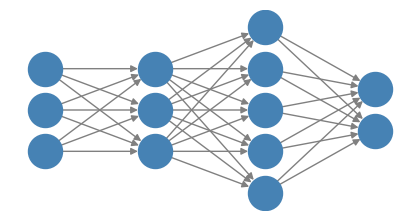

In [4]:

import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_network(layers):
    G = nx.DiGraph()
    pos = {}
    node_id = 0
    x_spacing = 2
    y_spacing = 1.5
    max_layer_size = max(layers)
    
    for layer_idx, num_nodes in enumerate(layers):
        x = layer_idx * x_spacing
        y_offset = (max_layer_size - num_nodes) / 2
        for i in range(num_nodes):
            y = (i + y_offset) * y_spacing
            G.add_node(node_id, pos=(x, -y))
            pos[node_id] = (x, -y)
            node_id += 1
    
    prev_layer_nodes = list(range(layers[0]))
    current_node = layers[0]
    
    for layer_idx in range(1, len(layers)):
        current_layer_nodes = list(range(current_node, current_node + layers[layer_idx]))
        for prev_node in prev_layer_nodes:
            for curr_node in current_layer_nodes:
                G.add_edge(prev_node, curr_node)
        prev_layer_nodes = current_layer_nodes
        current_node += layers[layer_idx]
    
    plt.figure(figsize=(4 ,2))
    nx.draw(G, pos, with_labels=False, node_size=600, node_color='steelblue', edge_color='gray')
    plt.show()

layers = [3, 3, 5, 2]
draw_neural_network(layers)

In [7]:
import numpy as np 
class MLP:
    def __init__(self , num_inputs = 3 , num_hidden = [3 , 5] , num_outputs = 2):
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs

        #each item in this liste represente the number neuron in the layer's item
        layers = [num_inputs] + num_hidden + [num_outputs]
        # initiate random weights
        weights = [] 

        for i in range ( len(layers) - 1 ) :
            w = np.random.rand(layers[i] , layers[i + 1]) # creating a matric of size layers[i] * layers[i + 1]
            weights.append(w)
        self.weights = weights 


    def forward_propagate(self , inputs ):
     
        activations = inputs

        for w in self.weights:

            net_inputs = np.dot(activations , w )
            activations = self._sigmoid(net_inputs)

        return activations

    def _sigmoid(self, x):
        y = 1.0 / (1 + np.exp(-x))
        return y

if __name__ == "__main__":

    # create a Multilayer Perceptron
    mlp = MLP()

    # set random values for network's input
    inputs = np.random.rand(mlp.num_inputs)

    # perform forward propagation
    output = mlp.forward_propagate(inputs)

    print("Network activation: {}".format(inputs))
    print("Network activation: {}".format(output))
        


Network activation: [0.46375551 0.89568567 0.41115226]
Network activation: [0.74311717 0.74023477]


In [30]:
from sklearn.model_selection import train_test_split
import numpy as np
from random import random
import tensorflow as tf


def generate_dataset(num_samples, test_size=0.33):
 

    # build inputs/targets for sum operation: y[0][0] = x[0][0] + x[0][1]
    x = np.array([[random()/2 for _ in range(2)] for _ in range(num_samples)])
    y = np.array([[i[0] + i[1]] for i in x])

    # split dataset into test and training sets

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    return x_train , x_test, y_train , y_test

if __name__ == "__main__":
    x_train , x_test , y_train , y_test = generate_dataset(100 , 0.3)
    
    #building the model : 2 | 5 | 1
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_dim=2, activation="sigmoid"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])


    # compile 
    optimiser = tf.keras.optimizers.SGD(learning_rate = 0.1) # stochastique gradient descent
    model.compile(optimizer = optimiser , loss = "MSE") # mean square error

    #train model
    model.fit(x_train , y_train , epochs = 100)
    #evaluate
    print("\n\n\n-----------------------------------------------\n\n")
    model.evaluate(x_test , y_test , verbose = True)
    data = np.array([ 
        [0.1 , 0.2] , 
        [0.2 , 0.2]
    ])

    print("\n\n-------preidction---------\n\n ")
    predictions = model.predict(data)
    
    for d , p in zip(data , predictions):
        print("{} + {} = {}".format(d[0] , d[1] , p[0] ) )


C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0810 
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0739 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0674
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0701 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0621 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0623
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0539 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0580 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0523 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0537
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0507 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0458 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0484
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0455
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0463
Epoch 16/1